<h2> 0. Pre-solution Part </h2>

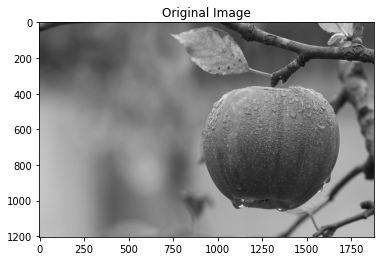

In [2]:
# 0.Pre-solution
import PIL.Image as pilimg
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt
from decimal import Decimal
imageFile1 = pilimg.open('../img/Gray_Apple.jpeg')
imageFile2 = pilimg.open('../img/d.jpg')
matrixA = np.array(imageFile1)
matrixLow = np.array(imageFile2)
plt.title('Original Image')
plt.imshow(matrixA, cmap='gray') # Display original image file

<h2> Problem 1. Write a computer program that performs the following: </h2>

image resolution(matrix A) : 1880 x 1204

image resolution(converted matrix A) : 1024 x 1024



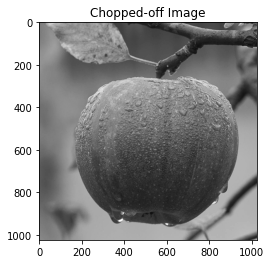

In [3]:
# sol 1.(a) : Take a grayscale image and form a matrix A
def getImageResolution(imgArray) : # get image resolution by Image array
    return len(imgArray[0]), len(imgArray) # return (width, height)

print('image resolution(matrix A) : {} x {}\n'.format(*getImageResolution(matrixA)))

# get chopped-off version of A
convertedA = []
x = 750
y = 100
for row in matrixA :
    convertedA.append(row[x:x+1024])
convertedA = convertedA[y:y+1024]
print('image resolution(converted matrix A) : {} x {}\n'.format(*getImageResolution(convertedA)))
plt.title('Chopped-off Image')
plt.imshow(convertedA, cmap='gray')

In [4]:
# sol 1.(b) : For given n = 2t , t = 0, 1, ..., construct an n-point Haar matrix H in the lecture

def getHaarMatrix(n, normalized=True):
    # Allow only size n of power 2
    if n % 2 != 0 :
        return "Err : n should be multiple of 2"
    n = 2**np.ceil(np.log2(n))
    if n > 2:
        h = getHaarMatrix(n / 2)
    else :
        return np.array([[1, 1], [1, -1]])

    # calculate upper haar part
    h_n = np.kron(h, [1, 1])
    # calculate lower haar part 
    if normalized:
        h_i = np.sqrt(n/2)*np.kron(np.eye(len(h)), [1, -1])
    else:
        h_i = np.kron(np.eye(len(h)), [1, -1])
    # combine parts
    h = np.vstack((h_n, h_i))
    return h

def printHaarMatrix(n, normalized=True) :
    print('\nHaarMatrix for n = {} (normalized form)\n\n'.format(n,), getHaarMatrix(n, normalized))

printHaarMatrix(2)
printHaarMatrix(4)
printHaarMatrix(8)


HaarMatrix for n = 2 (normalized form)

 [[ 1  1]
 [ 1 -1]]

HaarMatrix for n = 4 (normalized form)

 [[ 1.          1.          1.          1.        ]
 [ 1.          1.         -1.         -1.        ]
 [ 1.41421356 -1.41421356  0.         -0.        ]
 [ 0.         -0.          1.41421356 -1.41421356]]

HaarMatrix for n = 8 (normalized form)

 [[ 1.          1.          1.          1.          1.          1.
   1.          1.        ]
 [ 1.          1.          1.          1.         -1.         -1.
  -1.         -1.        ]
 [ 1.41421356  1.41421356 -1.41421356 -1.41421356  0.          0.
  -0.         -0.        ]
 [ 0.          0.         -0.         -0.          1.41421356  1.41421356
  -1.41421356 -1.41421356]
 [ 2.         -2.          0.         -0.          0.         -0.
   0.         -0.        ]
 [ 0.         -0.          2.         -2.          0.         -0.
   0.         -0.        ]
 [ 0.         -0.          0.         -0.          2.         -2.
   0.         -0. 

In [5]:
# sol 1.(c) : Perform 2-D Discrete Haar Wavelet Transform (DHWT) B = HTAH.
def matrixMultiplier(matrices) :
    result = []
    for idx, matrix in enumerate(matrices) :
        if idx == 0 :
            result = matrix
        else :
            result = np.matmul(result, matrix)
    return result
haarMatrix = getHaarMatrix(len(convertedA))

matrixB = matrixMultiplier([np.transpose(haarMatrix), convertedA, haarMatrix])
print('(width, height) of matrix B : ', getImageResolution(matrixB))
print('\nMatrix B\n', matrixB)

(width, height) of matrix B :  (1024, 1024)

Matrix B
 [[ 688313.5537364   407417.03441755  363155.60766668 ... -470835.0418215
  -252631.94113169 -671458.24282725]
 [ 285884.8186294   181116.29931055  162196.06479788 ... -154662.36652333
  -153933.96267669 -230744.26437225]
 [ 393104.59234059  285913.8621268   179386.95564662 ... -310742.07002707
  -138420.44906657 -390708.96165708]
 ...
 [-440554.97529671 -201470.31148454 -241505.28898845 ...  241115.61252637
   183558.7175657   415448.50925366]
 [-201513.65936244 -184702.45489048 -106614.19264815 ...  171535.78651597
    82069.98830374  183065.61286599]
 [-731909.72025864 -356698.51578668 -389375.80191858 ...  465605.9649236
   253759.23708863  731586.86165088]]


In [18]:
# sol 1.(d) 
# For given k = 2^s , s = 0, 1, ..., construct an n × n matrix Bˆ such that
    # • its k × k upper left corner is equal to the k × k upper left corner of B
    # • all the other entries are zero.
    # So if k = n, Bˆ = B.
import math

def getUpperLeftMatrix(matrix, k) :
    newMatrix = []
    if k > len(matrix) :
        return 'k should be smaller than len(matrix)'
    if not math.log2(k).is_integer() :
        return "'k' should be exponent of 2"
    for index, row in enumerate(matrix) :
        newRow = []
        for idx, element in enumerate(row) :
            if index >= k or idx >= k :
                newRow.append(0)
            else :
                newRow.append(element)
        newMatrix.append(newRow)
    return np.array(newMatrix)
for i in range(11) :
    print('when k is {}\n'.format(pow(2,i)))
    print(getUpperLeftMatrix(matrixB, pow(2, i)), end="\n\n")
    # print(findValidValue())
    print('=====================================================================\n')

when k is 1

[[688313.5537364      0.             0.        ...      0.
       0.             0.       ]
 [     0.             0.             0.        ...      0.
       0.             0.       ]
 [     0.             0.             0.        ...      0.
       0.             0.       ]
 ...
 [     0.             0.             0.        ...      0.
       0.             0.       ]
 [     0.             0.             0.        ...      0.
       0.             0.       ]
 [     0.             0.             0.        ...      0.
       0.             0.       ]]


when k is 2

[[688313.5537364  407417.03441755      0.         ...      0.
       0.              0.        ]
 [285884.8186294  181116.29931055      0.         ...      0.
       0.              0.        ]
 [     0.              0.              0.         ...      0.
       0.              0.        ]
 ...
 [     0.              0.              0.         ...      0.
       0.              0.        ]
 [     0.            

In [8]:
# sol 1.(e) : Perform the inverse 2-D Discrete Haar Wavelet Transform (IDHWT) Aˆ = HBHˆ T
reConvertedA = matrixMultiplier([haarMatrix, matrixB , np.transpose(haarMatrix)])
print(reConvertedA)

[[1.32120576e+08 1.32120576e+08 1.31072000e+08 ... 1.20586240e+08
  1.28974848e+08 1.57286400e+08]
 [1.32120576e+08 1.32120576e+08 1.32120576e+08 ... 1.40509184e+08
  1.68820736e+08 1.88743680e+08]
 [1.31072000e+08 1.31072000e+08 1.32120576e+08 ... 1.48897792e+08
  1.70917888e+08 1.70917888e+08]
 ...
 [1.42606336e+08 1.42606336e+08 1.41557760e+08 ... 1.75112192e+08
  1.79306496e+08 1.83500800e+08]
 [1.42606336e+08 1.42606336e+08 1.41557760e+08 ... 1.84549376e+08
  1.86646528e+08 1.88743680e+08]
 [1.42606336e+08 1.42606336e+08 1.41557760e+08 ... 1.91889408e+08
  1.91889408e+08 1.92937984e+08]]


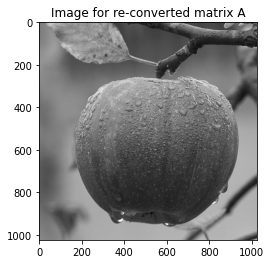

In [9]:
# sol 1.(f) : Show the reconstructed image Aˆ on the screen.
plt.title('Image for re-converted matrix A')
plt.imshow(reConvertedA, cmap='gray')

<h2> P2. Get any 2 grayscale images of any format from anywhere (Internet, your personal
photos, etc.). It is recommended that you get one image with low frequency components,
and one image filled with high frequency components. Use your computer program to do the
following: </h2>

[[106783.29755193  53417.49210119  63356.09931565 ... -45119.61555712
  -47278.94253574 -82111.74251533]
 [ 43378.66959125   8188.8641405   21642.73366506 ... -14219.74717095
  -14896.73996669 -38977.53994629]
 [ 53774.6395848   30511.06324334  33460.53802843 ... -27962.62395079
  -20995.81411627 -43435.22190503]
 ...
 [-38820.09521866  -9903.04241002 -21469.43838992 ...  14492.36630688
   13311.03353424  35278.32010779]
 [-47613.90126412 -25406.5142726  -26970.98467391 ...  20424.53713637
   21527.31636974  35384.47306256]
 [-87664.97541369 -46001.58842217 -50911.33792093 ...  38788.84997832
   37574.11808243  67815.27477525]]


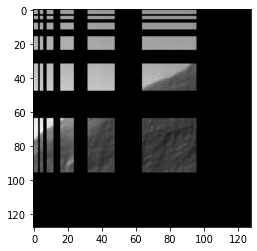

In [36]:
# sol 2.(a) : As k increases, observe the quality of reconstructed image.
convertedMatrixLow = []
x = 100
y = 50
for row in matrixLow :
    convertedMatrixLow.append(row[x:x+128])
convertedMatrixLow = convertedMatrixLow[y:y+128]
haar7 = getHaarMatrix(len(convertedMatrixLow))
convertedMatrixLowB = matrixMultiplier([np.transpose(haar7), convertedMatrixLow, haar7])
print(convertedMatrixLowB)
convertedMatrixLowB = getUpperLeftMatrix(convertedMatrixLowB, pow(2, 6))
reConvertedMatrixLow = matrixMultiplier([haar7, convertedMatrixLowB, np.transpose(haar7)])
plt.imshow(reConvertedMatrixLow, cmap='gray')

In [11]:
# sol 2.(b) : Describe any difference between low-freq. image and high-freq. image.


In [12]:
# sol 2.(c) : Discuss any Findings or thoughts.


<h2> 3. For n-point Haar matrix H, define Hl and Hh as follows: where Hl and Hh have the same number of rows. That is, Hl and Hh are the top half and
bottom half rows of HT . Note that Hl (or Hh) is a part of basis capturing relatively low (or
high) frequency components.</h2>

In [13]:
# sol 3.(a) Show that the DHWT B = HTAH is given as ...
vertical = 0
horizontal = 1
def getSeperatedMatrix(matrix) :
    haarLength = int(len(matrix) / 2)
    return matrix[:haarLength], matrix[haarLength:]
def getSeperatedDWHT(matrix) : 
    halfLength= int(getImageResolution(matrix)[0]/2)
    H_l, H_h = getSeperatedMatrix(getHaarMatrix(halfLength * 2))
    left_upper = matrixMultiplier([H_l, matrix, np.transpose(H_l)])
    right_upper = matrixMultiplier([H_l, matrix, np.transpose(H_h)])
    left_lower = matrixMultiplier([H_h, matrix, np.transpose(H_l)])
    right_lower = matrixMultiplier([H_h, matrix, np.transpose(H_h)])
    return left_upper, right_upper, left_lower, right_lower
left_upper_B, right_upper_B, left_lower_B, right_lower_B = getSeperatedDWHT(convertedA)
upperB = np.concatenate((left_upper_B, right_upper_B), axis=horizontal)
lowerB = np.concatenate((left_lower_B, right_lower_B), axis=horizontal)
assembledB = np.concatenate((upperB, lowerB), axis=vertical)
print("Is the quadrant matrix in this problem equal to H^TAH ? :",np.array_equal(assembledB, matrixB))
print("Is the quadrant matrix in this problem equal to HAH^T ? :",np.array_equal(assembledB, matrixMultiplier([haarMatrix, convertedA, np.transpose(haarMatrix)])))

Is the quadrant matrix in this problem equal to H^TAH ? : False
Is the quadrant matrix in this problem equal to HAH^T ? : True


<h2>Evaluation to Prob 3.(a) : It seems that the quadrant matrix in the problem 3.(a) is not equal to H^TAH but HAH^T.</h2>

In [14]:
# sol 3.(b) Show that the IDHWT A = HBH^T is given as ...
def sumArr(matrices) :
    result = []
    for idx, matrix in enumerate(matrices) :
        if idx == 0 :
            result = matrix
        else :
            result = np.add(result, matrix)
    return result
H_l, H_h = getSeperatedMatrix(getHaarMatrix(len(convertedA)))
term1 = matrixMultiplier([np.transpose(H_l), H_l, convertedA, np.transpose(H_l), H_l])
term2 = matrixMultiplier([np.transpose(H_l), H_l, convertedA, np.transpose(H_h), H_h])
term3 = matrixMultiplier([np.transpose(H_h), H_h, convertedA, np.transpose(H_l), H_l])
term4 = matrixMultiplier([np.transpose(H_h), H_h, convertedA, np.transpose(H_h), H_h])
sumOfTerms = sumArr([term1, term2, term3, term4])
print("Is sum of terms equals to HBH^T ? :", np.isclose(reConvertedA, sumOfTerms).all())

Is sum of terms equals to HBH^T ? : True


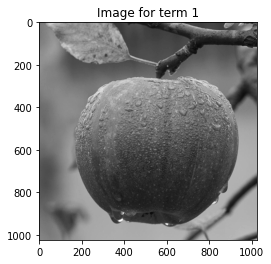

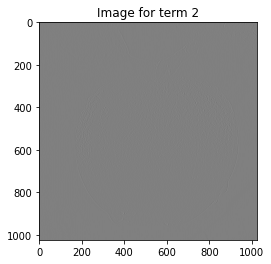

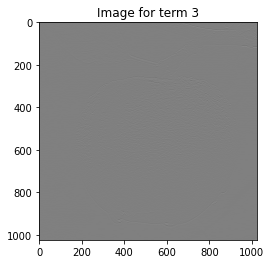

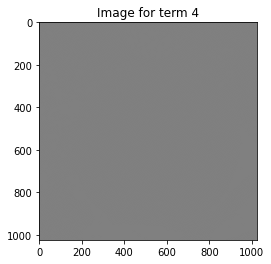

In [15]:
# sol 3.(c) Each term in (b) is an n x n matrix. Show each term in (b) as an image, and discuss what each of matrices contains.
terms = [term1, term2, term3, term4]
for idx, term in enumerate(terms) :
    plt.figure()
    plt.title('Image for term {}'.format(idx+1))
    plt.imshow(term, cmap="gray")

In [16]:
# sol 3.(d) Repeat (a) and (b) for the first term in (b).
H_ll, H_lh = getSeperatedMatrix(H_l)

term1_term1 = matrixMultiplier([np.transpose(H_ll), H_ll, convertedA, np.transpose(H_ll), H_ll])
term1_term2 = matrixMultiplier([np.transpose(H_ll), H_ll, convertedA, np.transpose(H_lh), H_lh])
term1_term3 = matrixMultiplier([np.transpose(H_lh), H_lh, convertedA, np.transpose(H_ll), H_ll])
term1_term4 = matrixMultiplier([np.transpose(H_lh), H_lh, convertedA, np.transpose(H_lh), H_lh])
term1s = [term1_term1, term1_term2, term1_term3, term1_term4]
sumOfTerms_term1 = sumArr(term1s)
print("Is sum of terms equals to HBH^T ? :", np.isclose(term1, sumOfTerms_term1).all())

Is sum of terms equals to HBH^T ? : True
